# <font size= 1> <font color='FFFFFF'> Redes neuronales recurrentes

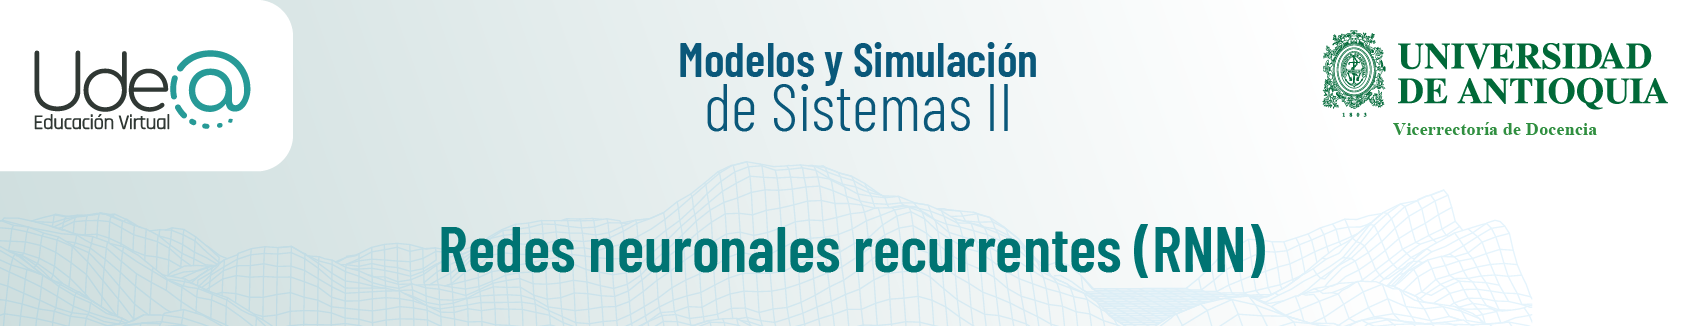

In [ ]:
from IPython.display import Image

Las redes neuronales recurrentes (Recurrent Neural Networks - RNN) son una familia de redes neuronales para procesar datos secuenciales, las cuales se basan en el principio de compartir parámetros a lo largo de diferentes partes del modelo, lo que permite su aplicación a datos con estructuras diferentes, por ejemplo, diferentes longitudes, y generalizar sobre ellos.

Las RNN pueden resolver diferentes paradigmas de aprendizaje, es decir, tienen la capacidad de ajustarse a diferentes configuraciones en los datos. El diagrama construido por <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Andrej Karpathy</a> representa muy bien dicha capacidad:
**image caption generation**, **análisis de texto**, **traducción**, **etiqueta y morfosintaxis**.

### <font size= 1> <font color='FFFFFF'> Backpropagation Through Time (BPTT)

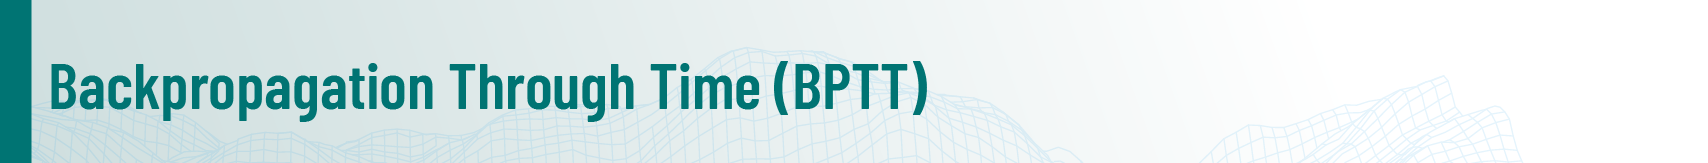

Para incorporar las habilidades descritas, una RNN incluye la capacidad de mantener memoria interna y usar la información almacenada a través de lazos de realimentación para darle soporte al modelamiento temporal, es decir, a la condición de dependencia estadística de observaciones consecutivas.

Como se puede observar <a href="https://future-tech-association.org/2018/01/16/kotoba_kioku_tech/">en esta figura</a>, la salida de las neuronas en la capa oculta es usada nuevamente como entrada a la misma capa.


In [ ]:
pip install neurolab

Epoch: 100; Error: 0.25406027748104354;
Epoch: 200; Error: 0.08126821169881818;
Epoch: 300; Error: 0.11255289544358449;
Epoch: 400; Error: 0.06377342728109289;
Epoch: 500; Error: 0.07542824383503992;
The maximum number of train epochs is reached


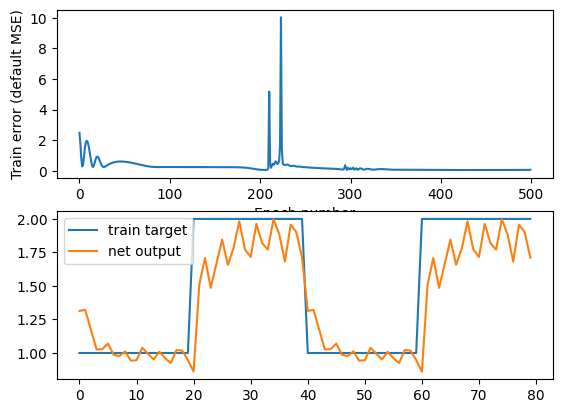

In [ ]:
import neurolab as nl
import numpy as np

# Create train samples
i1 = np.sin(np.arange(0, 20))
i2 = np.sin(np.arange(0, 20)) * 2

t1 = np.ones([1, 20])
t2 = np.ones([1, 20]) * 2

input = np.array([i1, i2, i1, i2]).reshape(20 * 4, 1)
target = np.array([t1, t2, t1, t2]).reshape(20 * 4, 1)

# Create network with 2 layers
net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
# Set initialized functions and init
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Train network
error = net.train(input, target, epochs=500, show=100, goal=0.01)
# Simulate network
output = net.sim(input)

# Plot result
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error (default MSE)')

pl.subplot(212)
pl.plot(target.reshape(80))
pl.plot(output.reshape(80))
pl.legend(['train target', 'net output'])
pl.show()

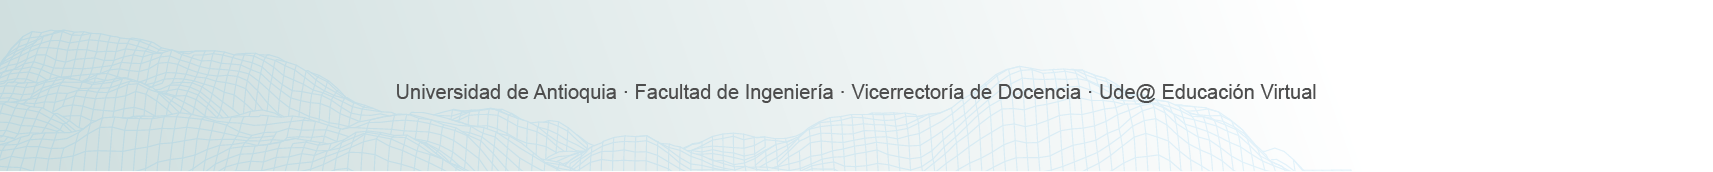